# Pré Processamento dos dados para o Subsistema SECO (Teste)

O objetivo deste código é gerar um .csv com todos os dados de teste

## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importação e visualização dos dados

### Importação

In [3]:
dados = pd.read_csv('../Dados/N_2026-01-18_CARGAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados.index = pd.to_datetime(dados.index, format="%Y-%m-%dT%H:%M:%SZ")
dados

,Carga
DataHora,
2018-01-01 01:00:00,5010.39965
2018-01-01 02:00:00,4896.20885
2018-01-01 03:00:00,4934.37915
2018-01-01 04:00:00,5025.49700
2018-01-01 05:00:00,5031.51760
...,...
2026-01-17 20:00:00,8326.64600
2026-01-17 21:00:00,8348.91300
2026-01-17 22:00:00,8408.11450


In [4]:
dados_temperatura = pd.read_csv('../Dados/N_2026-01-18_EXOGENAHIST.csv', sep=';', index_col='DataHora', decimal=',')
dados_temperatura.index = pd.to_datetime(dados_temperatura.index, format="%Y-%m-%dT%H:%M:%SZ")
dados_temperatura

,Exo_Temperatura
DataHora,
2018-01-01 00:00:00,26.100000
2018-01-01 01:00:00,25.500000
2018-01-01 02:00:00,25.809999
2018-01-01 03:00:00,25.209999
2018-01-01 04:00:00,25.209999
...,...
2026-01-17 19:00:00,27.030000
2026-01-17 20:00:00,27.050000
2026-01-17 21:00:00,26.920000


In [5]:
dias_feriados = pd.read_csv('../Dados/N_2026-01-18_FERIADOS.csv', sep=';', index_col='Data')
dias_feriados.index = pd.to_datetime(dias_feriados.index, format="%Y-%m-%d")
dias_feriados

,Tipo
Data,
2018-01-01,6
2018-01-02,7
2018-02-12,3
2018-02-13,4
2018-02-14,5
...,...
2025-12-25,6
2025-12-26,7
2025-12-31,8


### Retirando valores fora do teste

In [6]:
dados = dados[dados.index >= '2024-12-29 00:00:00']
dados = dados[dados.index.year < 2026]
dados

,Carga
DataHora,
2024-12-29 00:00:00,8237.14950
2024-12-29 01:00:00,8166.44815
2024-12-29 02:00:00,8068.20360
2024-12-29 03:00:00,7884.57400
2024-12-29 04:00:00,7781.59180
...,...
2025-12-31 19:00:00,8063.68050
2025-12-31 20:00:00,8510.06150
2025-12-31 21:00:00,8519.87350


In [7]:
dados_temperatura = dados_temperatura[dados_temperatura.index >= '2024-12-29 00:00:00']
dados_temperatura = dados_temperatura[dados_temperatura.index.year < 2026]
dados_temperatura

,Exo_Temperatura
DataHora,
2024-12-29 00:00:00,26.41
2024-12-29 01:00:00,26.10
2024-12-29 02:00:00,26.10
2024-12-29 03:00:00,26.10
2024-12-29 04:00:00,25.81
...,...
2025-12-31 19:00:00,28.29
2025-12-31 20:00:00,27.71
2025-12-31 21:00:00,26.85


In [8]:
dias_feriados = dias_feriados[dias_feriados.index >= '2024-12-29 00:00:00']
dias_feriados = dias_feriados[dias_feriados.index.year < 2026]
dias_feriados

,Tipo
Data,
2024-12-29,12
2024-12-30,12
2024-12-31,8
2025-01-01,6
2025-01-02,7
2025-01-03,12
2025-01-04,12
2025-01-05,12
2025-01-06,12


### Vizualização

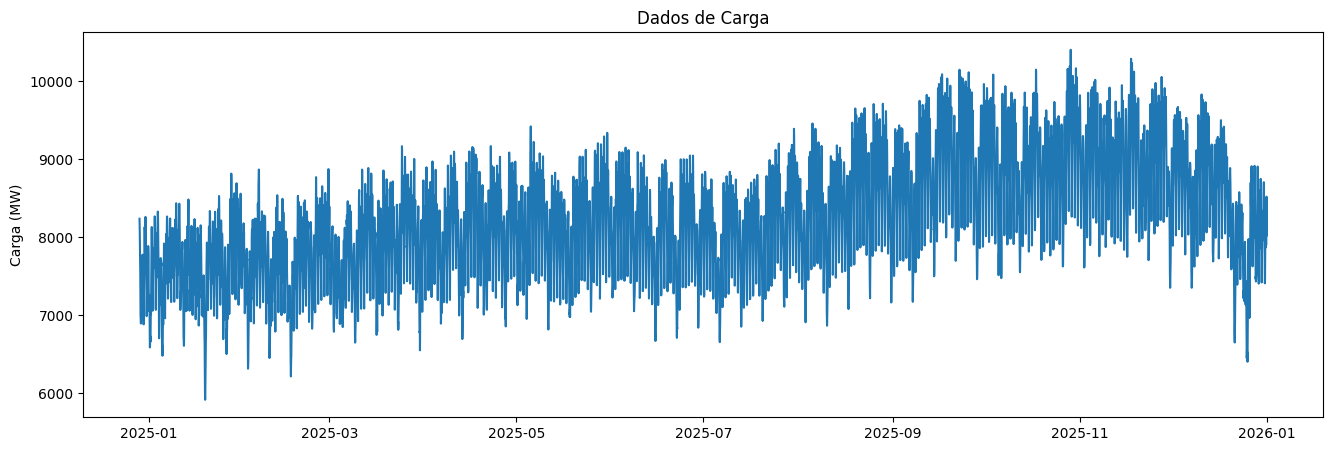

In [9]:
plt.figure(figsize=(16, 5))
plt.plot(dados.index, dados['Carga'], linestyle='-')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

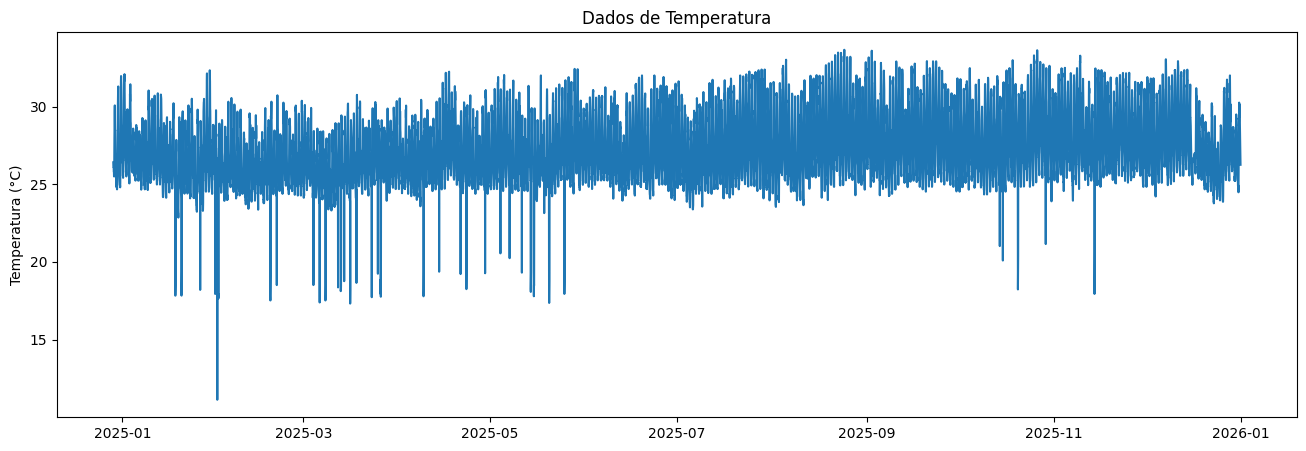

In [10]:
plt.figure(figsize=(16, 5))
plt.plot(dados_temperatura.index, dados_temperatura['Exo_Temperatura'], linestyle='-')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

## Adicionando dados importantes para o treinamento no dataframe

In [11]:
# No dia 16/12/2025 faltou algumas horas de dados para temperatura, esses dados foram substituidos pelos valores de temperatura do dia anterior

faltantes = dados.index.difference(dados_temperatura.index)
print(faltantes)

DatetimeIndex(['2025-12-16 09:00:00', '2025-12-16 10:00:00',
               '2025-12-16 11:00:00', '2025-12-16 12:00:00',
               '2025-12-16 13:00:00', '2025-12-16 14:00:00',
               '2025-12-16 15:00:00', '2025-12-16 16:00:00',
               '2025-12-16 17:00:00', '2025-12-16 18:00:00',
               '2025-12-16 19:00:00', '2025-12-16 20:00:00',
               '2025-12-16 21:00:00', '2025-12-16 22:00:00',
               '2025-12-16 23:00:00'],
              dtype='datetime64[ns]', name='DataHora', freq=None)


In [12]:
dados_temperatura = dados_temperatura.reindex(dados.index)

In [13]:
faltantes = dados.index.difference(dados_temperatura.index)
print(faltantes)

DatetimeIndex([], dtype='datetime64[ns]', name='DataHora', freq=None)


In [14]:
dados_temperatura.isna().sum()

Exo_Temperatura    15
dtype: int64

In [15]:
mask_nan = dados_temperatura.isna()

dados_temperatura[mask_nan] = (
    dados_temperatura.shift(24)[mask_nan]
)

In [16]:
dados_temperatura.isna().sum()

Exo_Temperatura    0
dtype: int64

In [17]:
dados_com_adicao = dados.copy()
dados_com_adicao

,Carga
DataHora,
2024-12-29 00:00:00,8237.14950
2024-12-29 01:00:00,8166.44815
2024-12-29 02:00:00,8068.20360
2024-12-29 03:00:00,7884.57400
2024-12-29 04:00:00,7781.59180
...,...
2025-12-31 19:00:00,8063.68050
2025-12-31 20:00:00,8510.06150
2025-12-31 21:00:00,8519.87350


In [18]:
dados_com_adicao['Temperatura'] = dados_temperatura['Exo_Temperatura']
dados_com_adicao

,Carga,Temperatura
DataHora,,
2024-12-29 00:00:00,8237.14950,26.41
2024-12-29 01:00:00,8166.44815,26.10
2024-12-29 02:00:00,8068.20360,26.10
2024-12-29 03:00:00,7884.57400,26.10
2024-12-29 04:00:00,7781.59180,25.81
...,...,...
2025-12-31 19:00:00,8063.68050,28.29
2025-12-31 20:00:00,8510.06150,27.71
2025-12-31 21:00:00,8519.87350,26.85


In [19]:
for col in dados_com_adicao.columns:
    idx_nan = dados_com_adicao.index[dados_com_adicao[col].isna()]
    if len(idx_nan) > 0:
        print(f"\nColuna: {col}")
        print(idx_nan[:10])  # primeiros exemplos


In [20]:
# Adicionando o dia da semana no formato trigonométrico

dados_com_adicao['Dia_da_Semana'] = dados_com_adicao.index.dayofweek
dados_com_adicao['seno_dia_semana'] = np.sin(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))
dados_com_adicao['cosseno_dia_semana'] = np.cos(dados_com_adicao['Dia_da_Semana'] * (2 * np.pi / 7))

dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana
DataHora,,,,,
2024-12-29 00:00:00,8237.14950,26.41,6,-0.781831,0.623490
2024-12-29 01:00:00,8166.44815,26.10,6,-0.781831,0.623490
2024-12-29 02:00:00,8068.20360,26.10,6,-0.781831,0.623490
2024-12-29 03:00:00,7884.57400,26.10,6,-0.781831,0.623490
2024-12-29 04:00:00,7781.59180,25.81,6,-0.781831,0.623490
...,...,...,...,...,...
2025-12-31 19:00:00,8063.68050,28.29,2,0.974928,-0.222521
2025-12-31 20:00:00,8510.06150,27.71,2,0.974928,-0.222521
2025-12-31 21:00:00,8519.87350,26.85,2,0.974928,-0.222521


In [21]:
# Adicionando o mês do ano no formato trigonométrico

dados_com_adicao['Mes'] = dados_com_adicao.index.month  # Janeiro = 1, ..., Dezembro = 12
dados_com_adicao['seno_mes'] = np.sin(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao['cosseno_mes'] = np.cos(dados_com_adicao['Mes'] * (2 * np.pi / 12))
dados_com_adicao

,Carga,Temperatura,Dia_da_Semana,seno_dia_semana,cosseno_dia_semana,Mes,seno_mes,cosseno_mes
DataHora,,,,,,,,
2024-12-29 00:00:00,8237.14950,26.41,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 01:00:00,8166.44815,26.10,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 02:00:00,8068.20360,26.10,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 03:00:00,7884.57400,26.10,6,-0.781831,0.623490,12,-2.449294e-16,1.0
2024-12-29 04:00:00,7781.59180,25.81,6,-0.781831,0.623490,12,-2.449294e-16,1.0
...,...,...,...,...,...,...,...,...
2025-12-31 19:00:00,8063.68050,28.29,2,0.974928,-0.222521,12,-2.449294e-16,1.0
2025-12-31 20:00:00,8510.06150,27.71,2,0.974928,-0.222521,12,-2.449294e-16,1.0
2025-12-31 21:00:00,8519.87350,26.85,2,0.974928,-0.222521,12,-2.449294e-16,1.0


In [22]:
# Limpando os dados das colunas auxiliares

dados_com_adicao.drop(['Dia_da_Semana', 'Mes'], axis='columns', inplace=True)
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,8237.14950,26.41,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,8166.44815,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,8068.20360,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,7884.57400,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,7781.59180,25.81,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,8063.68050,28.29,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,8510.06150,27.71,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,8519.87350,26.85,0.974928,-0.222521,-2.449294e-16,1.0


In [23]:
dados_com_adicao.columns

Index(['Carga', 'Temperatura', 'seno_dia_semana', 'cosseno_dia_semana',
       'seno_mes', 'cosseno_mes'],
      dtype='object')

## Normalizando os dados

In [24]:
# Pegando a normalização já existente do treinamento e validação

dados_normalizacao = pd.read_csv("Normalizacao_N.txt", index_col=0)
dados_normalizacao

,Carga,Exo_Temperatura
Min,3845.95218,18.531
Max,11608.44300,38.159


In [25]:
carga_maximo = dados_normalizacao[dados_normalizacao.index == 'Max']["Carga"]
carga_minimo = dados_normalizacao[dados_normalizacao.index == 'Min']["Carga"]

print(f'Valor máximo de carga: {carga_maximo}')
print(f'Valor mínimo de carga: {carga_minimo}')

Valor máximo de carga: Max    11608.443
Name: Carga, dtype: float64
Valor mínimo de carga: Min    3845.95218
Name: Carga, dtype: float64


In [26]:
carga_maxima_para_normalizacao = carga_maximo.iloc[0]
carga_minima_para_normalizacao = carga_minimo.iloc[0]

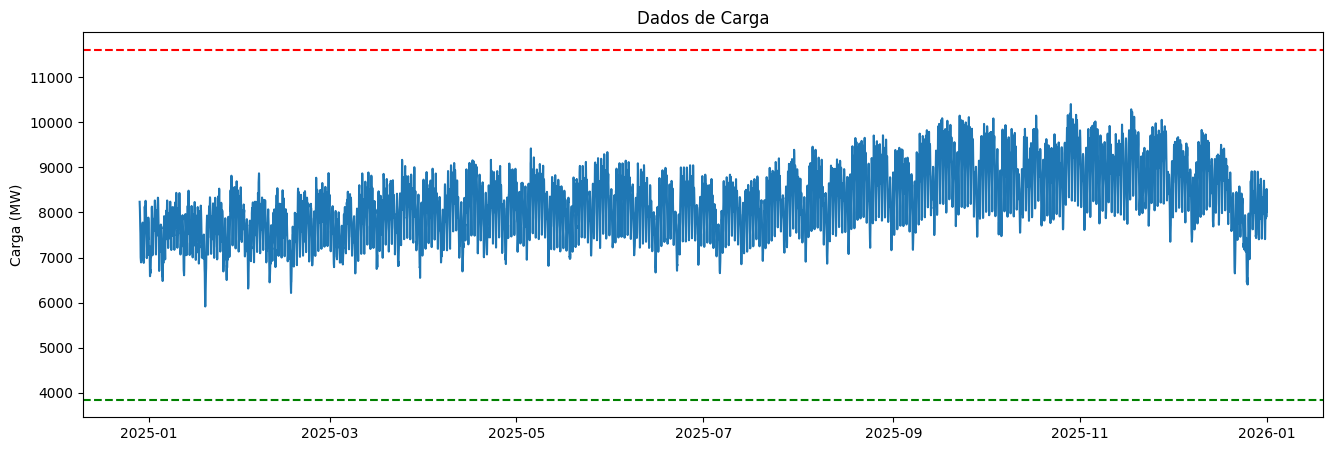

In [27]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Carga'], linestyle='-')
plt.axhline(y=carga_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=carga_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

In [28]:
# Normalizando dados

dados_com_adicao['Carga'] = 2*(dados_com_adicao['Carga'] - carga_minima_para_normalizacao) / (carga_maxima_para_normalizacao - carga_minima_para_normalizacao)-1
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,0.131389,26.41,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,0.113173,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,0.087860,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,0.040548,26.10,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,0.014015,25.81,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,0.086695,28.29,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,0.201704,27.71,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,0.204232,26.85,0.974928,-0.222521,-2.449294e-16,1.0


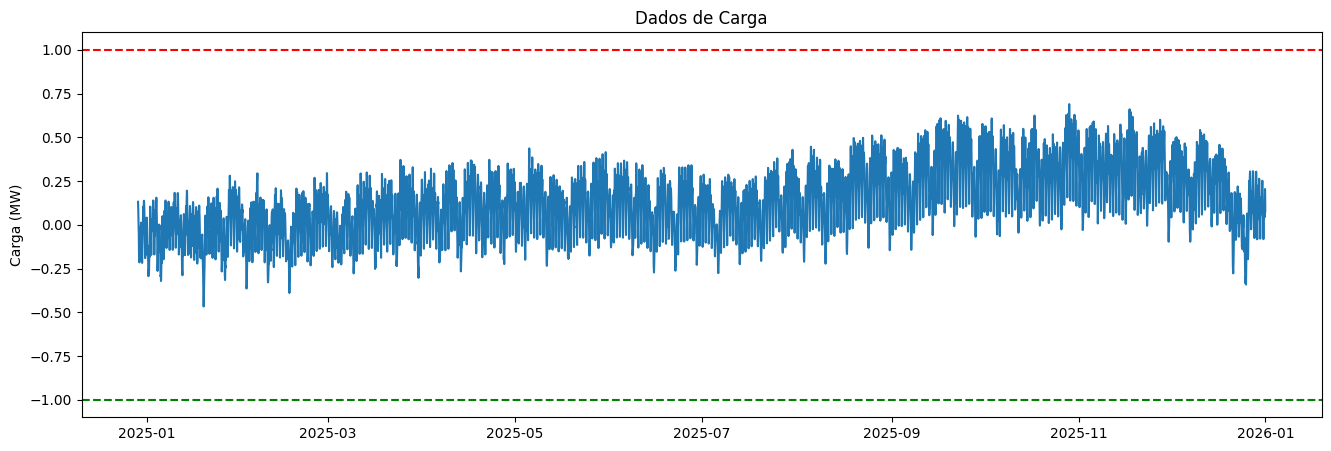

In [29]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Carga'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Carga')
plt.ylabel('Carga (MW)')
plt.show()

### Temperatura

In [30]:
temperatura_maxima = dados_normalizacao[dados_normalizacao.index == 'Max']["Exo_Temperatura"]
temperatura_minimo = dados_normalizacao[dados_normalizacao.index == 'Min']["Exo_Temperatura"]

print(f'Valor máximo de carga: {temperatura_maxima}')
print(f'Valor mínimo de carga: {temperatura_minimo}')

Valor máximo de carga: Max    38.159
Name: Exo_Temperatura, dtype: float64
Valor mínimo de carga: Min    18.531
Name: Exo_Temperatura, dtype: float64


In [31]:
temperatura_maxima_para_normalizacao = temperatura_maxima.iloc[0]
temperatura_minima_para_normalizacao = temperatura_minimo.iloc[0]

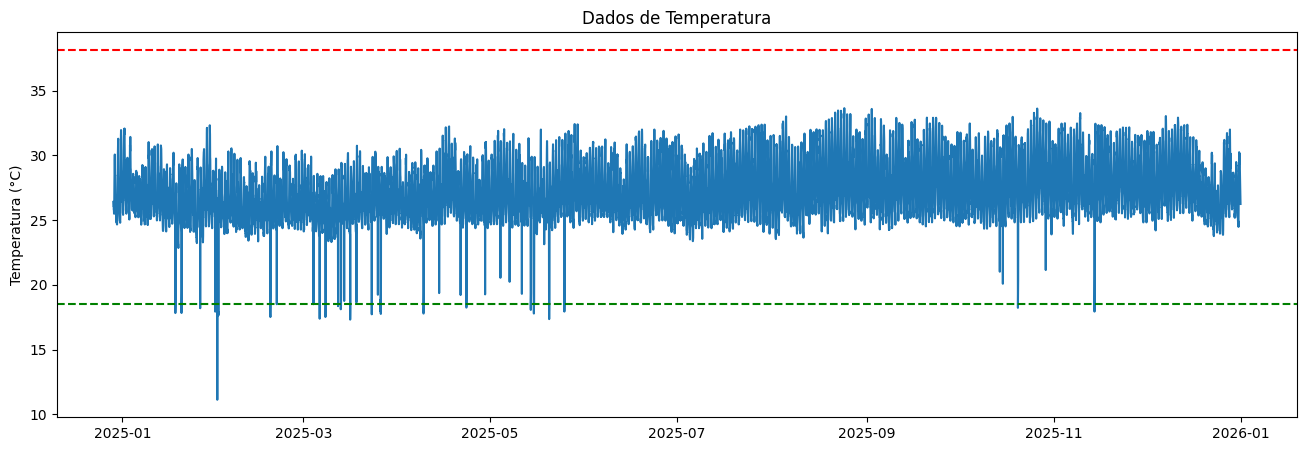

In [32]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Temperatura'], linestyle='-')
plt.axhline(y=temperatura_maxima_para_normalizacao, color='r', linestyle='--')
plt.axhline(y=temperatura_minima_para_normalizacao, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

In [33]:
# Normalizando dados

dados_com_adicao['Temperatura'] = 2*(dados_com_adicao['Temperatura'] - temperatura_minima_para_normalizacao) / (temperatura_maxima_para_normalizacao - temperatura_minima_para_normalizacao)-1
dados_com_adicao

,Carga,Temperatura,seno_dia_semana,cosseno_dia_semana,seno_mes,cosseno_mes
DataHora,,,,,,
2024-12-29 00:00:00,0.131389,-0.197167,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 01:00:00,0.113173,-0.228755,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 02:00:00,0.087860,-0.228755,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 03:00:00,0.040548,-0.228755,-0.781831,0.623490,-2.449294e-16,1.0
2024-12-29 04:00:00,0.014015,-0.258304,-0.781831,0.623490,-2.449294e-16,1.0
...,...,...,...,...,...,...
2025-12-31 19:00:00,0.086695,-0.005604,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 20:00:00,0.201704,-0.064703,0.974928,-0.222521,-2.449294e-16,1.0
2025-12-31 21:00:00,0.204232,-0.152333,0.974928,-0.222521,-2.449294e-16,1.0


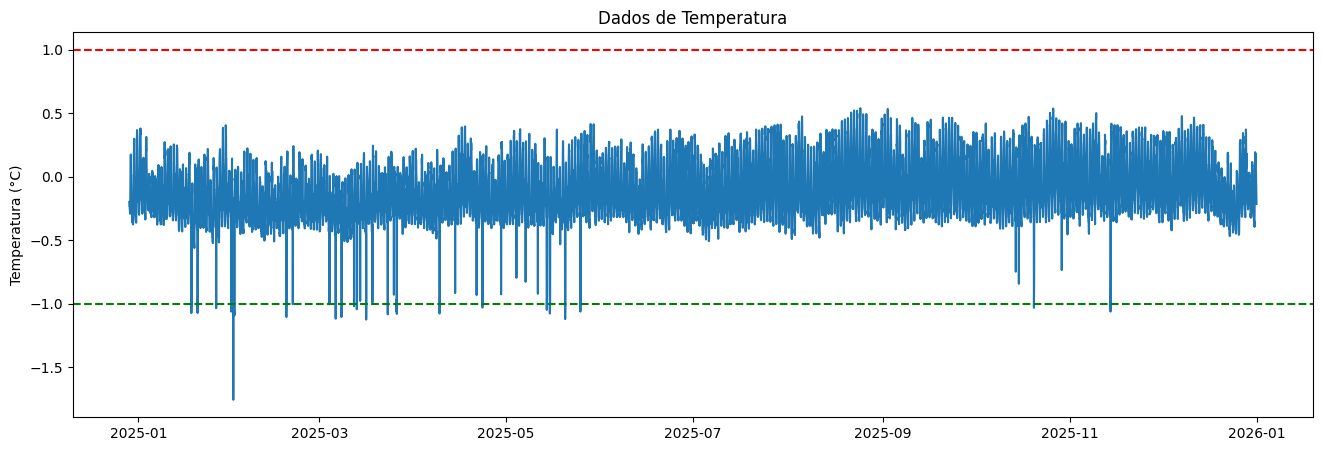

In [34]:
plt.figure(figsize=(16, 5))
plt.plot(dados_com_adicao.index, dados_com_adicao['Temperatura'], linestyle='-')
plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='g', linestyle='--')
plt.title('Dados de Temperatura')
plt.ylabel('Temperatura (°C)')
plt.show()

## Salvando normalizações e pré processamento

In [35]:
# Salvando dados

dados_com_adicao.to_csv('N_teste.csv')